<a href="https://colab.research.google.com/github/Alvarosotom/Redes_Neuronales/blob/main/PyTorch_2_profe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import PIL                            #biblioteca de Python que se utiliza para trabajar con imágenes.
import cv2                            #biblioteca de código abierto ampliamente utilizada para aplicaciones de visión por computadora.
import numpy as np

# Convolutional Neural Networks

# Convolution

In [ ]:
!wget https://cdn.ndtv.com/tech/images/gadgets/pikachu_hi_pokemon.jpg -O pikachu.jpg

--2023-10-05 23:34:07--  https://cdn.ndtv.com/tech/images/gadgets/pikachu_hi_pokemon.jpg
Resolving cdn.ndtv.com (cdn.ndtv.com)... 23.215.125.11, 2600:1407:3c00:1493::24e8, 2600:1407:3c00:1486::24e8
Connecting to cdn.ndtv.com (cdn.ndtv.com)|23.215.125.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44842 (44K) [image/jpeg]
Saving to: ‘pikachu.jpg’

pikachu.jpg         100%[===================>]  43.79K  --.-KB/s    in 0.01s   

2023-10-05 23:34:07 (3.63 MB/s) - ‘pikachu.jpg’ saved [44842/44842]



Utilicemos opencv para leer la imagen (convertirla a escala de gris) y luego convertir la matriz (de pixeles) en un tensor con el cual PyTorch pueda hacer operaciones

In [ ]:
I = cv2.imread("pikachu.jpg",cv2.IMREAD_GRAYSCALE)  #de la libreria open cv
print(I.shape)
I1 = torch.from_numpy(I).float().reshape(1,1,600,800)
print(I1.shape)

(600, 800)
torch.Size([1, 1, 600, 800])


Realicemos lo mismo pero ahora utlizando la libreria PIL (Python Image Library) y algunas herramientas que nos brinda Torchvision (paquete especializado en Computer Vision)

In [ ]:
I = PIL.Image.open(open("pikachu.jpg","rb"))
transf = torchvision.transforms.Compose([
  torchvision.transforms.Grayscale(),
  torchvision.transforms.ToTensor()
])
I1 = transf(I)  #tranforma la iamgne (girar la imagen)
I1 = I1.reshape(1,1,600,800) #dimenciones

FileNotFoundError: ignored

Veamos un ejemplo de convolución entre matrices

In [ ]:
F = torch.tensor([[0,1,0],[1,-4,1],[0,1,0]]).float().reshape(1,1,3,3)
I2 = torch.conv2d(I1,F)
print(I2)

tensor([[[[ 3.9216e-03,  7.8431e-03,  3.9215e-03,  ..., -3.9216e-03,
            7.8432e-03,  0.0000e+00],
          [-7.8431e-03,  3.9215e-03, -7.8431e-03,  ...,  7.8431e-03,
           -7.8431e-03,  7.8432e-03],
          [ 7.8431e-03, -7.8431e-03,  7.8431e-03,  ..., -3.9216e-03,
            7.8431e-03,  5.9605e-08],
          ...,
          [-3.9216e-03,  3.9216e-03, -7.8431e-03,  ...,  7.8431e-03,
           -3.9216e-03,  7.8431e-03],
          [ 3.9215e-03,  7.8431e-03,  3.9216e-03,  ..., -7.8431e-03,
            7.8431e-03, -3.9216e-03],
          [-7.8431e-03,  3.9216e-03, -7.8432e-03,  ...,  7.8431e-03,
           -7.8431e-03,  7.8431e-03]]]])


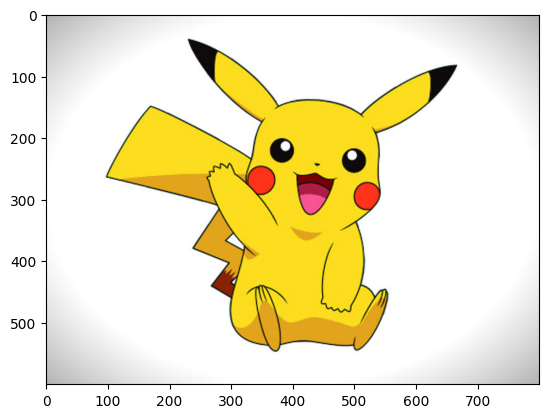

In [ ]:
plt.imshow(I,cmap="hot")

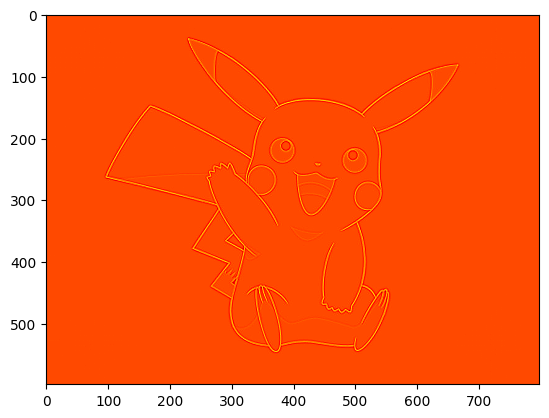

In [ ]:
plt.imshow(I2.reshape(598,798).numpy(),cmap="hot")

Veamos con una matriz más pequeña la como se realiza esta operación y como se realiza el backpropagation en esta operación

In [ ]:
A = torch.arange(1,10).reshape(1,1,3,3).float().requires_grad_(True)    # requires_grad_(True) activar la opción de gradientes (arange: es un arreglo)
F = torch.tensor([[1,2],[3,4]]).reshape(1,1,2,2).float().requires_grad_(True)
print(A)
print(F)

tensor([[[[1., 2., 3.],
          [4., 5., 6.],
          [7., 8., 9.]]]], requires_grad=True)
tensor([[[[1., 2.],
          [3., 4.]]]], requires_grad=True)


In [ ]:
B = torch.conv2d(A,F)
print(B)
tot = torch.sum(B*B)    #creamos
print(tot)

tensor([[[[37., 47.],
          [67., 77.]]]], grad_fn=<ConvolutionBackward0>)
tensor(13996., grad_fn=<SumBackward0>)


In [ ]:
tot.backward()

In [ ]:
d_B = 2*B
print(d_B)

tensor([[[[ 74.,  94.],
          [134., 154.]]]], grad_fn=<MulBackward0>)


In [ ]:
F.grad

tensor([[[[1568., 2024.],
          [2936., 3392.]]]])

In [ ]:
torch.conv2d(A,d_B)

tensor([[[[1568., 2024.],
          [2936., 3392.]]]], grad_fn=<ConvolutionBackward0>)

In [ ]:
A.grad

tensor([[[[  74.,  242.,  188.],
          [ 356., 1000.,  684.],
          [ 402.,  998.,  616.]]]])

In [ ]:
torch.conv2d(d_B,F.flip(0,1,3,2),padding=1)

tensor([[[[  74.,  242.,  188.],
          [ 356., 1000.,  684.],
          [ 402.,  998.,  616.]]]], grad_fn=<ConvolutionBackward0>)

Convolutional Layer utilizado en las redes neuronales

In [ ]:
conv_layer = nn.Conv2d(1,3,kernel_size=3)    #capa convolucional (nn.Conv2d: capa de red neuronal convolucional)

In [ ]:
for param in conv_layer.parameters():
  print(param.shape)

torch.Size([3, 1, 3, 3])
torch.Size([3])


In [ ]:
x = torch.rand(10,1,5,5)

In [ ]:
conv_layer(x).shape

torch.Size([10, 3, 3, 3])

# Pooling Layers

Otros de los layers más utilizados en redes neuronales son los pooling layers.

# Max Pooling Layers

Dentro de los pooling layers, talvez el que más se utiliza son los max pool layers, debido al bajo coste computacional y a su eficiencia que se ha demostrado experimentalmente.

In [ ]:
max_pool = nn.MaxPool2d(kernel_size=2)

Veamos el tipo de operación que realiza el max pooling layer

In [ ]:
x = torch.randint(low=0,high=10,size=(1,1,6,6)).float()
print(x)

tensor([[[[6., 9., 5., 2., 6., 0.],
          [3., 2., 7., 9., 6., 1.],
          [5., 3., 5., 3., 8., 1.],
          [2., 3., 7., 7., 6., 3.],
          [3., 7., 1., 5., 3., 8.],
          [9., 6., 6., 2., 1., 5.]]]])


In [ ]:
max_pool(x)

tensor([[[[9., 9., 6.],
          [5., 7., 8.],
          [9., 6., 8.]]]])

# Average Pooling Layers

In [ ]:
avg_pool = nn.AvgPool2d(kernel_size=2)

In [ ]:
x = torch.randint(low=0,high=10,size=(1,1,4,4)).float()
print(x)

tensor([[[[5., 6., 8., 2.],
          [5., 1., 2., 7.],
          [0., 9., 4., 7.],
          [0., 1., 8., 0.]]]])


In [ ]:
avg_pool(x)

tensor([[[[5.0000, 6.0000],
          [6.0000, 2.5000]]]])

# Adaptive Average Pooling Layers

In [ ]:
m = nn.AdaptiveAvgPool2d((1))

x = np.array(
[
    [ 2981. , 2089. , 2523. , 2321.],
    [ 3392. , 2509. , 2321., 3261.],
    [3051. , 2233. , 473. , 2722.],
    [2645. , 1844. , 1427. ,2154.],

])

input = torch.tensor(x)
print(input)

output = m(input)
print(output)
print(torch.mean(input))

tensor([[2981., 2089., 2523., 2321.],
        [3392., 2509., 2321., 3261.],
        [3051., 2233.,  473., 2722.],
        [2645., 1844., 1427., 2154.]], dtype=torch.float64)
tensor([[2371.6250]], dtype=torch.float64)
tensor(2371.6250, dtype=torch.float64)


In [ ]:
adap_avg_pool = nn.AdaptiveAvgPool2d(1)

In [ ]:
adap_avg_pool(x)

IndexError: ignored

# Dropout Layers

Uno de los grandes problemas recurrentes en el entrenamiento de redes neuronales, es el "sobreentrenamiento" o "overfitting". Esto significa que el modelo se ha adecuado tanto a los datos de entrenamiento que no produce buenas predicciones para nuevos datos. Para evitar este tipo de problemas se utilizan métodos de regularización (como L1 and L2 regularization methods en problemas de regresión), pero en el mundo de redes neuronales los dropout layers son los más utilizados.

In [ ]:
drop_layer = nn.Dropout2d(p=0.5)

In [ ]:
x = torch.randint(low=0,high=10,size=(1,3,2,2)).float()
print(x)

tensor([[[[4., 0.],
          [2., 6.]],

         [[9., 9.],
          [6., 6.]],

         [[7., 2.],
          [1., 4.]]]])


In [ ]:
drop_layer(x)

tensor([[[[ 0.,  0.],
          [ 0.,  0.]],

         [[18., 18.],
          [12., 12.]],

         [[ 0.,  0.],
          [ 0.,  0.]]]])

# Batch Normalization Layers

Otro de los layers muy utilizados son los batch norm layers. Básicamente estos layers reescalan los datos utilizando una media y una variación que se va calculando durando el entrenamiento. Esto permite que los valores que se van pasando entre los layers de la red neuronal no exploten y crezcan descontroladamente.

Veamos un ejemplo de como el batch norm layer opera

In [ ]:
x = torch.randint(low=0,high=10,size=(1,3,4,4)).float()

In [ ]:
bn_layer = nn.BatchNorm2d(3)

In [ ]:
print(bn_layer.running_mean)
print(bn_layer.running_var)

tensor([0., 0., 0.])
tensor([1., 1., 1.])


In [ ]:
bn_layer(x)

tensor([[[[-1.5908, -0.2686,  1.0536, -1.5908],
          [ 0.3925, -1.2602,  0.0620,  1.3842],
          [-0.9297, -0.5991,  1.3842, -0.5991],
          [ 0.7231,  0.3925,  1.3842,  0.0620]],

         [[-0.6437, -0.3004, -0.9870,  0.3862],
          [-0.3004, -0.9870, -1.3303,  1.7595],
          [-0.9870,  0.7295,  1.0729,  0.3862],
          [ 1.7595, -0.9870,  1.0729, -0.6437]],

         [[ 0.7441,  0.0225, -1.4205,  0.0225],
          [-1.4205,  0.3833, -1.4205,  0.0225],
          [ 1.1048,  1.8263,  1.4656,  0.0225],
          [ 0.3833,  0.3833, -1.0597, -1.0597]]]],
       grad_fn=<NativeBatchNormBackward0>)

In [ ]:
print(bn_layer.running_mean)
print(bn_layer.running_var)

tensor([0.5000, 0.4563, 0.4375])
tensor([1.7667, 2.0196, 1.8450])


Recreemos esta operación

In [ ]:
mu = torch.mean(x,axis=(2,3))
var = torch.var(x,axis=(2,3))
bias_var = torch.var(x,axis=(2,3),unbiased=False)
print(0.9 * 0 + 0.1 * mu, 0.9 * 1 + 0.1  * var )

tensor([[0.5000, 0.4563, 0.4375]]) tensor([[1.7667, 2.0196, 1.8450]])


In [ ]:
(x - mu.reshape(1,3,1,1)) / (bias_var.reshape(1,3,1,1) + 1e-5)** 0.5

tensor([[[[ 0.3508, -1.7541,  0.7016,  1.0525],
          [ 0.3508,  1.0525,  0.3508, -0.3508],
          [ 0.7016, -1.7541,  0.3508, -1.4033],
          [-0.7016, -1.0525,  0.7016,  1.4033]],

         [[ 1.3697,  0.7524, -0.7910,  0.4437],
          [ 0.7524, -0.1736, -1.0996, -0.4823],
          [-1.4083,  1.3697, -1.0996,  1.0610],
          [-1.4083,  0.1350,  1.3697, -0.7910]],

         [[-0.7979,  1.2179,  0.5459, -0.4620],
          [ 0.2100,  1.5539, -0.7979, -1.1339],
          [ 1.5539, -0.7979, -0.7979, -1.1339],
          [ 0.8819, -1.4699,  0.5459,  0.8819]]]])

# Vanishing Gradient Problem

Otro de los problemas recurrentes cuando se entrenan redes neuronales, es el problema del desvanecimiento del gradiente. Especialmente en redes neuronales grandes (deep neuronal networks), al momento de realizar el backpropagation, debido a la cantidad de layers, el gradiente que se propaga se vuelve cada vez más pequeño haciendo que los primeros layers no se entrenen apropiadamente o que se demoren en entrenarse en comparación con los layers más próximos a la última capa.

Veamos un ejemplo de esto

In [ ]:
model = nn.Sequential(
    nn.Linear(2,3),
    nn.Sigmoid(),
    nn.Linear(3,5),
    nn.Sigmoid(),
    nn.Linear(5,5),
    nn.Sigmoid(),
    nn.Linear(5,5),
    nn.Sigmoid(),
    nn.Linear(5,1),
    nn.Sigmoid(),
)

In [ ]:
x = torch.rand(1,2)
y = torch.ones(1,1)

In [ ]:
crit = nn.MSELoss()

In [ ]:
l = crit(model(x),y)
l.backward()

In [ ]:
for param in model.parameters():
  print(param.grad)

tensor([[-1.5960e-05, -1.4479e-05],
        [ 1.8687e-05,  1.6953e-05],
        [ 1.0720e-05,  9.7255e-06]])
tensor([-9.7673e-05,  1.1436e-04,  6.5607e-05])
tensor([[-2.1403e-05, -3.7099e-05, -3.7146e-05],
        [ 3.2062e-05,  5.5576e-05,  5.5646e-05],
        [-8.6834e-06, -1.5052e-05, -1.5070e-05],
        [-1.3323e-04, -2.3094e-04, -2.3123e-04],
        [ 2.2555e-04,  3.9097e-04,  3.9146e-04]])
tensor([-6.4520e-05,  9.6652e-05, -2.6176e-05, -4.0163e-04,  6.7993e-04])
tensor([[-0.0008, -0.0014, -0.0015, -0.0013, -0.0012],
        [-0.0007, -0.0013, -0.0014, -0.0013, -0.0012],
        [ 0.0010,  0.0018,  0.0019,  0.0017,  0.0016],
        [ 0.0004,  0.0007,  0.0008,  0.0007,  0.0006],
        [-0.0005, -0.0009, -0.0009, -0.0008, -0.0008]])
tensor([-0.0024, -0.0023,  0.0031,  0.0012, -0.0015])
tensor([[-0.0028, -0.0023, -0.0030, -0.0025, -0.0027],
        [ 0.0118,  0.0096,  0.0126,  0.0104,  0.0111],
        [ 0.0058,  0.0047,  0.0062,  0.0051,  0.0055],
        [ 0.0031,  0.0025,  

Para solucionar este problema, se utilizan los skip connections. Básicamente consiste en "conectar" la entrada con la salida de un layer (de ahi el nombre de skip o "shortcut"), esta conexión permite que el gradiente pase por ahi sin reducirse mucho.

In [ ]:
class SkipLinear(nn.Module):
  def __init__(self,in_features,out_features):
    super().__init__()
    self.fc = nn.Linear(in_features,out_features)
    self.shortcut = torch.eye(n = in_features, m = out_features)
  def forward(self,x):
    return x @ self.shortcut + torch.sigmoid(self.fc(x))

In [ ]:
model = nn.Sequential(
    SkipLinear(2,3),
    SkipLinear(3,5),
    SkipLinear(5,5),
    SkipLinear(5,5),
    nn.Linear(5,1),
    nn.Sigmoid(),
)

In [ ]:
l = crit(model(x),y)
l.backward()

In [ ]:
for param in model.parameters():
  print(param.grad)

tensor([[0.0009, 0.0008],
        [0.0009, 0.0008],
        [0.0015, 0.0013]])
tensor([0.0054, 0.0053, 0.0090])
tensor([[0.0038, 0.0031, 0.0020],
        [0.0037, 0.0030, 0.0020],
        [0.0079, 0.0064, 0.0041],
        [0.0073, 0.0060, 0.0039],
        [0.0066, 0.0054, 0.0035]])
tensor([0.0050, 0.0049, 0.0103, 0.0096, 0.0086])
tensor([[0.0065, 0.0075, 0.0059, 0.0014, 0.0022],
        [0.0083, 0.0095, 0.0076, 0.0018, 0.0028],
        [0.0113, 0.0130, 0.0103, 0.0024, 0.0038],
        [0.0144, 0.0165, 0.0131, 0.0031, 0.0048],
        [0.0098, 0.0113, 0.0090, 0.0021, 0.0033]])
tensor([0.0056, 0.0072, 0.0097, 0.0124, 0.0085])
tensor([[0.0125, 0.0149, 0.0124, 0.0062, 0.0091],
        [0.0083, 0.0099, 0.0082, 0.0041, 0.0060],
        [0.0114, 0.0136, 0.0114, 0.0057, 0.0083],
        [0.0192, 0.0229, 0.0192, 0.0096, 0.0140],
        [0.0149, 0.0178, 0.0149, 0.0074, 0.0109]])
tensor([0.0086, 0.0057, 0.0079, 0.0133, 0.0103])
tensor([[-0.2658, -0.3255, -0.2831, -0.1721, -0.2248]])
tensor([-0.1

# ResNet: Residual Neural Networks (son redes convolucionales con skip conection)

Uno de las rede convolucionales más famosas tal vez sean las redes residuales. Este tipo de redes son básicamente, redes convolucionales muy grandes (profundas) que utilizan skip connections.

Veamos un ejemplo de una red residual

In [3]:
cifar10_train_ds = torchvision.datasets.CIFAR10("./",train=True,download=True,transform=torchvision.transforms.ToTensor())  #estamos cargando el conjunto de entrenamiento.
cifar10_test_ds = torchvision.datasets.CIFAR10("./",train=False,download=True,transform=torchvision.transforms.ToTensor()) # estamos cargando el conjunto de prueba.

100%|██████████| 170498071/170498071 [00:02<00:00, 80360008.37it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [4]:
cifar10_labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"] #crea una lista donde se tienen el nombre de las clases en que son divididas los datos dle CIFAR-10

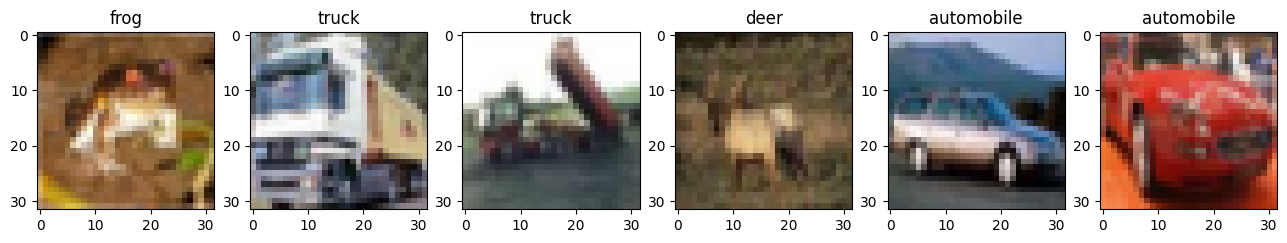

In [8]:
N = 5                                           #numero de imagenes
fig, axs = plt.subplots(1,N,figsize=(16,8))     #crea una trama donde estaran las N imagenes en una sola fila, ("figsize" establece el tamaño de la figura en 16 pulgadas de ancho y 8 pulgadas de alto.)
for i, (x,y) in enumerate(cifar10_train_ds):    #recorrer las primeras N imágenes en el conjunto de entrenamiento (cifar10_train_ds)
  if i == N:
    break
  axs[i].imshow(x.reshape(3,32,32).numpy().transpose(1,2,0))  #imshow se utiliza para mostrar la imagen x.(axs[i]: se refiere a la subtrama i)
                                                              #x.reshape(3, 32, 32) cambia la forma de la imagen de un tensor (3, 32, 32) a (32, 32, 3) para que sea compatible con la visualización de imágenes en color.
                                                              #numpy() convierte el tensor de PyTorch en un array NumPy para que pueda ser visualizado por Matplotlib.
                                                              #.transpose(1, 2, 0) reordena las dimensiones del array NumPy para que la imagen sea legible por Matplotlib.
  axs[i].set_title(cifar10_labels[y])                         #Establece el título de la subtrama i con la etiqueta correspondiente según la clase y de la imagen. Esto mostrará el nombre de la clase sobre cada imagen.
  #No es necesario una linea de coodigo que indique el final del ciclo for.

In [ ]:
cifar10_train_dl = torch.utils.data.DataLoader(cifar10_train_ds,batch_size=128)
cifar10_test_dl = torch.utils.data.DataLoader(cifar10_test_ds,batch_size=128)

In [ ]:
dev = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def evaluate(model, loader, crit):
  model.eval()
  total = 0
  corrects = 0
  avg_loss = 0
  for x, y in loader:
    x = x.to(dev)
    y = y.to(dev)
    o = model(x)
    loss = crit(o,y)
    avg_loss += loss.item()
    corrects += torch.sum(torch.argmax(o,axis=1) == y).item()
    total += len(y)
  acc = 100* corrects / total
  avg_loss /= len(loader)
  return avg_loss, acc

def train_one_epoch(model, train_loader, crit, optim):
  model.train()
  total = 0
  corrects = 0
  avg_loss = 0
  for x, y in train_loader:
    optim.zero_grad()
    x = x.to(dev)
    y = y.to(dev)
    o = model(x)
    loss = crit(o,y)
    avg_loss += loss.item()
    loss.backward()
    optim.step()
    corrects += torch.sum(torch.argmax(o,axis=1) == y).item()
    total += len(y)
  acc = 100 * corrects / total
  avg_loss /= len(train_loader)
  return avg_loss, acc

def train(model, train_loader, test_loader, crit, optim, epochs = 20):
  for epoch in range(epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader,crit, optim)
    test_loss, test_acc = evaluate(model, test_loader, crit)
    print(f"epoch: {epoch}, train loss: {train_loss}, train acc: {train_acc}%, test loss: {test_loss}, test acc: {test_acc}%")

Definamos nuestro "Bloque residual".

In [ ]:
class BasicResBlock(nn.Module):
  def __init__(self,in_planes, out_planes, kernel_size=3, stride=1,padding=1):
    super().__init__()
    self.conv1 = nn.Conv2d(in_planes, out_planes, kernel_size=kernel_size,stride=stride,padding=padding,bias=False)
    self.bn1 = nn.BatchNorm2d(out_planes)
    self.relu1 = nn.ReLU(inplace=True)
    self.conv2 = nn.Conv2d(out_planes, out_planes, kernel_size=kernel_size,stride=1,padding=padding,bias=False)
    self.bn2 = nn.BatchNorm2d(out_planes)
    self.relu2 = nn.ReLU()
    self.shortcut = nn.Sequential()
    if stride > 1 or in_planes != out_planes:
      self.shortcut = nn.Sequential(
          nn.Conv2d(in_planes,out_planes,kernel_size=1,stride=stride,padding=0,bias=False),
          nn.BatchNorm2d(out_planes)
      )
  def forward(self,x):
    o = self.conv1(x)
    o = self.bn1(o)
    o = self.relu1(o)
    o = self.conv2(o)
    o = self.bn2(o)
    o = self.relu2(self.shortcut(x) + o)
    return o

Construyamos nuestro model utilizando los bloques residuales que definimos antes.

In [ ]:
cifar10_model = nn.Sequential(
    BasicResBlock(3,16),
    nn.AvgPool2d(kernel_size=2),
    BasicResBlock(16,32),
    nn.AvgPool2d(kernel_size=2),
    BasicResBlock(32,64),
    nn.AvgPool2d(kernel_size=2),
    BasicResBlock(64,128),
    nn.AvgPool2d(kernel_size=2),
    BasicResBlock(128,128),
    nn.AvgPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(128,128),
    nn.ReLU(inplace=True),
    nn.Linear(128,10)
).to(dev)

Entrenemos nuestra red neuronal

In [ ]:
crit = nn.CrossEntropyLoss()
optim = torch.optim.SGD(cifar10_model.parameters(),lr=0.01)

train(cifar10_model, cifar10_train_dl, cifar10_test_dl, crit, optim, epochs=5)

epoch: 0, train loss: 1.7714573138815057, train acc: 36.994%, test loss: 1.6627119372162638, test acc: 41.54%
epoch: 1, train loss: 1.2827353482051274, train acc: 53.3%, test loss: 1.3999304213101351, test acc: 50.36%
epoch: 2, train loss: 1.058169974695386, train acc: 61.762%, test loss: 1.1030525512333158, test acc: 60.11%
epoch: 3, train loss: 0.9026239521972969, train acc: 67.842%, test loss: 0.9958313492280019, test acc: 64.48%
epoch: 4, train loss: 0.7849505711394502, train acc: 72.332%, test loss: 0.9441488981246948, test acc: 66.9%


In [ ]:
cifar10_model.eval()

Sequential(
  (0): BasicResBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU()
    (shortcut): Sequential(
      (0): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (2): BasicResBlock(
    (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1)

Veamos algunas predicciones

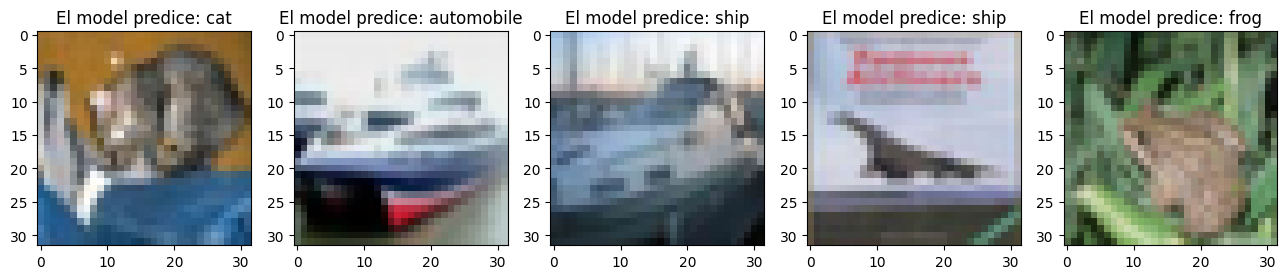

In [ ]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i,(x, y) in enumerate(iter(cifar10_test_ds)):
  if i == N:
    break
  x = x.reshape(1,3,32,32).to(dev)
  ypred = cifar10_model(x.to(dev))
  axs[i].imshow(x.cpu().reshape(3,32,32).numpy().transpose(1,2,0))
  axs[i].set_title(f"El model predice: {cifar10_labels[torch.argmax(ypred)]}")

Utilizemos otro dataset: CIFAR10


In [ ]:
cifar100_train_ds = torchvision.datasets.CIFAR100("./",train=True,download=True,transform=torchvision.transforms.ToTensor())
cifar100_test_ds = torchvision.datasets.CIFAR100("./",train=False,download=True,transform=torchvision.transforms.ToTensor())

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./cifar-100-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
import functools

cifar100_superclass = [['beaver', 'dolphin', 'otter', 'seal', 'whale'],
              ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
              ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
              ['bottle', 'bowl', 'can', 'cup', 'plate'],
              ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
              ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
              ['bed', 'chair', 'couch', 'table', 'wardrobe'],
              ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
              ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
              ['bridge', 'castle', 'house', 'road', 'skyscraper'],
              ['cloud', 'forest', 'mountain', 'plain', 'sea'],
              ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
              ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
              ['crab', 'lobster', 'snail', 'spider', 'worm'],
              ['baby', 'boy', 'girl', 'man', 'woman'],
              ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
              ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
              ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
              ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
              ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']]

cifar100_labels = sorted(functools.reduce(lambda a,b: a + b, cifar100_superclass))

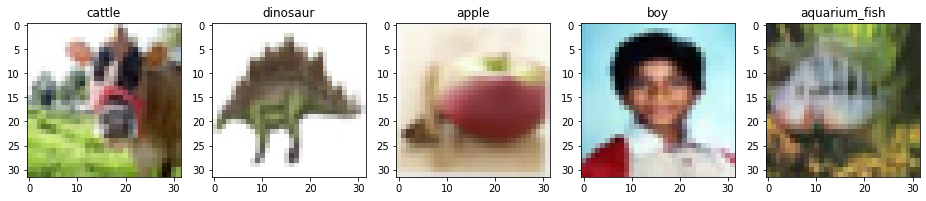

In [ ]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i, (x,y) in enumerate(cifar100_train_ds):
  if i == N:
    break
  axs[i].imshow(x.reshape(3,32,32).numpy().transpose(1,2,0))
  axs[i].set_title(cifar100_labels[y])

In [ ]:
cifar100_train_dl = torch.utils.data.DataLoader(cifar100_train_ds, batch_size = 128)
cifar100_test_dl = torch.utils.data.DataLoader(cifar100_test_ds, batch_size = 128)

In [ ]:
cifar100_model = nn.Sequential(
    BasicResBlock(3,16),
    nn.MaxPool2d(kernel_size=2),
    BasicResBlock(16,32),
    nn.MaxPool2d(kernel_size=2),
    BasicResBlock(32,64),
    nn.MaxPool2d(kernel_size=2),
    BasicResBlock(64,128),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(512,256),
    nn.ReLU(inplace=True),
    nn.Linear(256,100)
).to(dev)

In [ ]:
crit = nn.CrossEntropyLoss()
optim = torch.optim.Adam(cifar100_model.parameters(), lr=0.01)

train(cifar100_model, cifar100_train_dl, cifar100_test_dl,crit,optim,epochs=10)

epoch: 0, train loss: 3.9955804713851655, train acc: 7.606%, test loss: 3.656052296674704, test acc: 12.09%
epoch: 1, train loss: 3.3831156025762144, train acc: 17.112%, test loss: 3.335155963897705, test acc: 17.99%
epoch: 2, train loss: 3.0627322520136526, train acc: 23.066%, test loss: 3.0283568237401264, test acc: 23.88%
epoch: 3, train loss: 2.8430573275631956, train acc: 27.282%, test loss: 2.929079107091397, test acc: 25.57%
epoch: 4, train loss: 2.658494188962385, train acc: 30.9%, test loss: 2.79584034485153, test acc: 29.05%
epoch: 5, train loss: 2.48882836271125, train acc: 34.094%, test loss: 2.7710394466979595, test acc: 30.72%
epoch: 6, train loss: 2.328634625200725, train acc: 37.566%, test loss: 2.6863004376616657, test acc: 32.1%
epoch: 7, train loss: 2.177242443994488, train acc: 40.706%, test loss: 2.6544710382630554, test acc: 34.12%
epoch: 8, train loss: 2.0428274034539147, train acc: 43.614%, test loss: 2.6160182500187354, test acc: 35.33%
epoch: 9, train loss: 1.

In [ ]:
cifar100_model.eval()

Sequential(
  (0): BasicResBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU()
    (shortcut): Sequential(
      (0): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): BasicResBlock(
    (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kern

In [ ]:
M = 4
N = 5

In [ ]:
soft_max = nn.Softmax(dim=1)

In [ ]:
ypred_ = []
for i, (x, y) in enumerate(iter(cifar100_test_ds)):
  if i == N*M:
    break
  x = x.reshape(1,3,32,32).to(dev)
  ypred_.append(soft_max(cifar100_model(x).cpu().detach()))

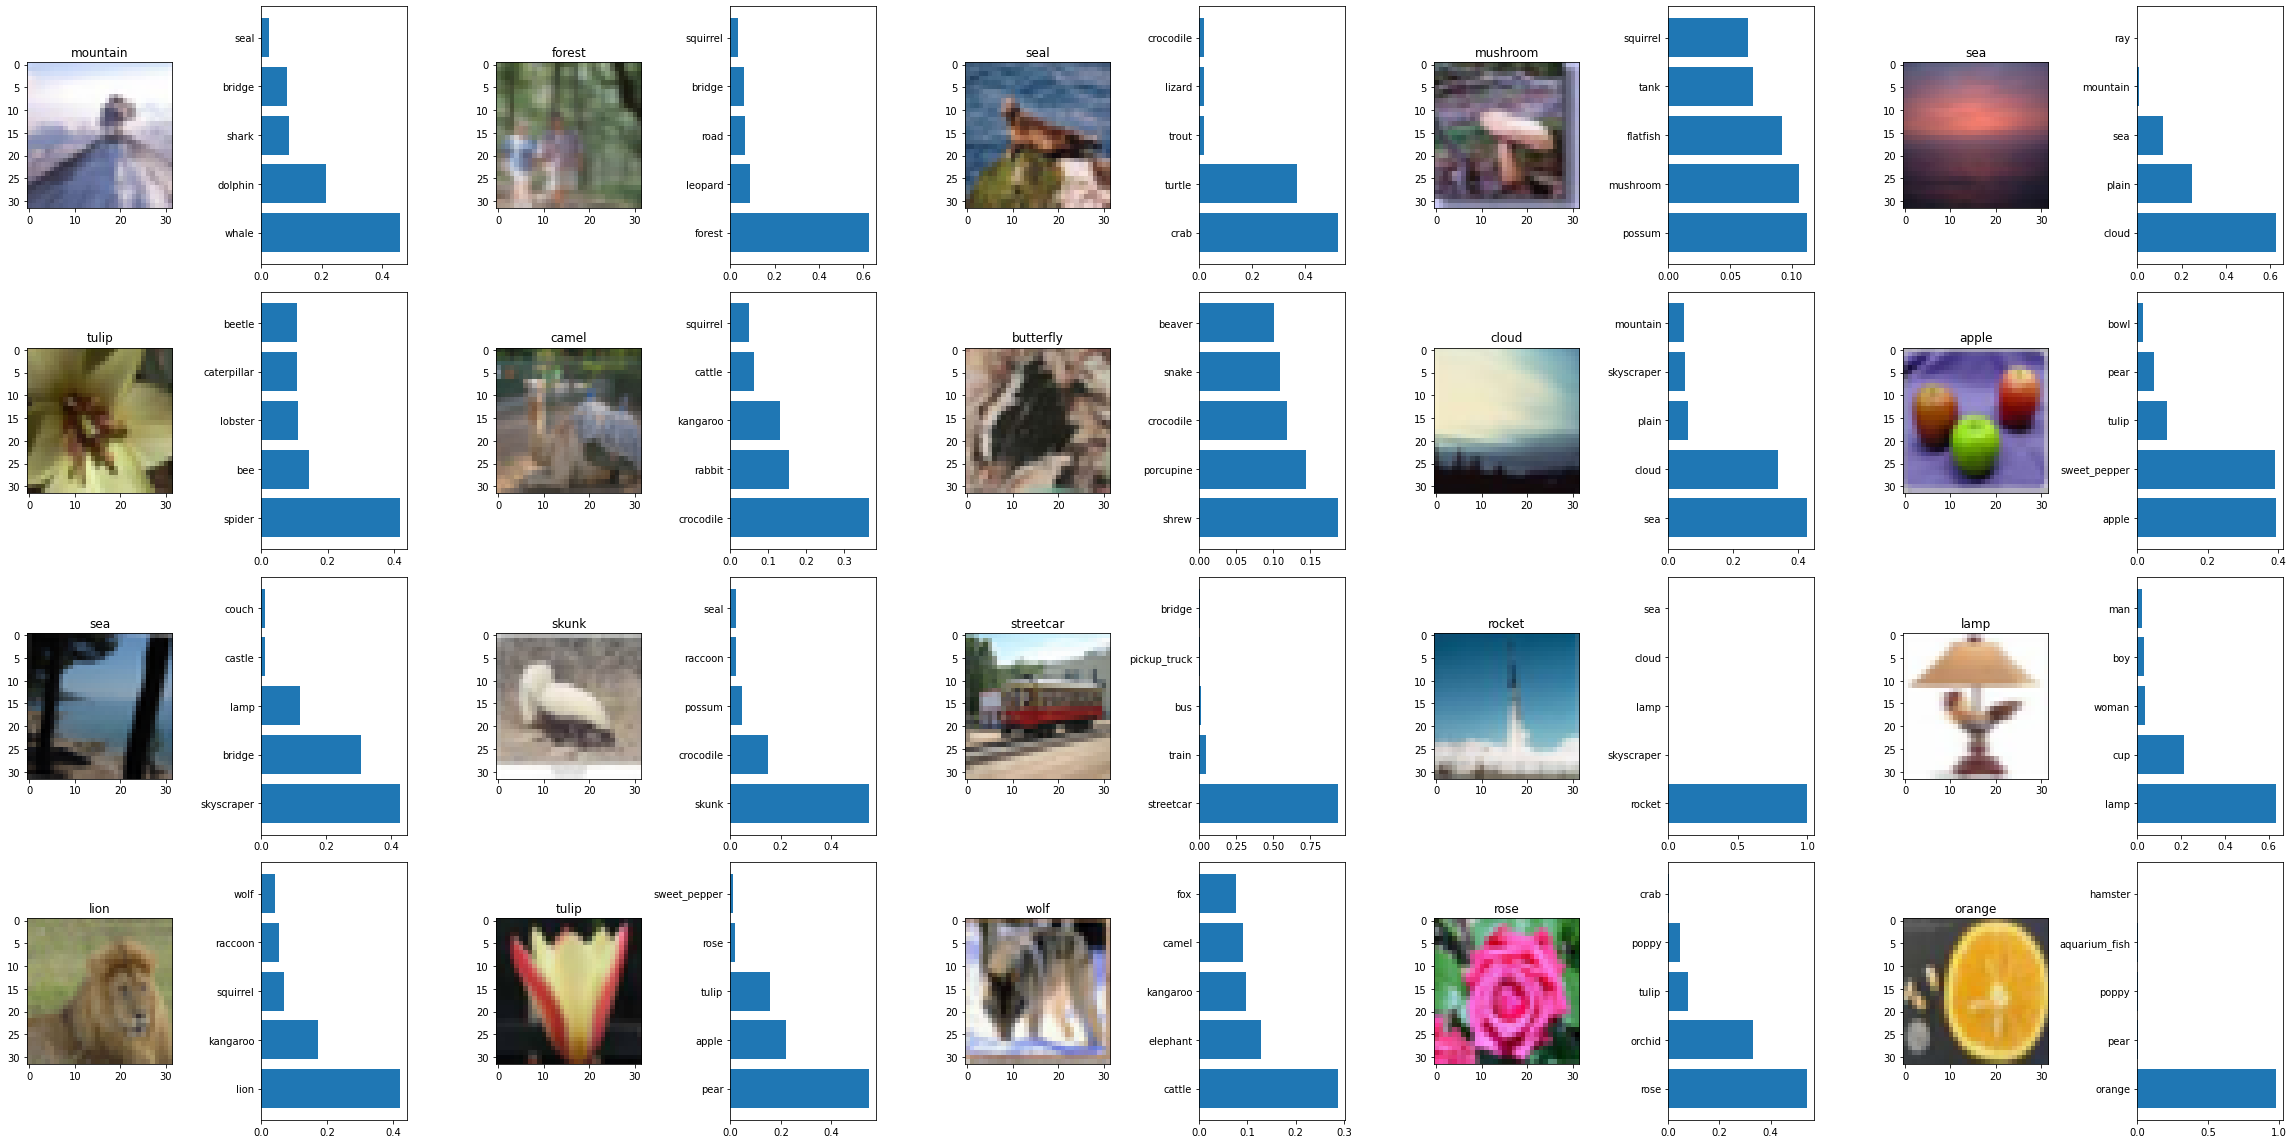

In [ ]:
fig, axs = plt.subplots(M,2*N,figsize=(32,4*M))
for i,(x, y) in enumerate(iter(cifar100_test_ds)):
  if i == N*M:
    break
  axs[i//N, 2*(i%N)].imshow(x.reshape(3,32,32).numpy().transpose(1,2,0))
  axs[i//N, 2*(i%N)].set_title(f"{cifar100_labels[y]}")
  top5_idxs = torch.argsort(ypred_[i][0],descending=True)[:5]
  axs[i//N, 2*(i%N) + 1].barh(list(range(5)),ypred_[i][0][top5_idxs].numpy())
  axs[i//N, 2*(i%N) + 1].set_yticks(list(range(5)))
  axs[i//N, 2*(i%N) + 1].set_yticklabels([cifar100_labels[i] for i in top5_idxs])
plt.tight_layout()

Veamos un model (resnet18) pre entrenado en el dataset Imagenet1K.

In [ ]:
resnet18_model = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
!wget https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt

with open("imagenet1000_clsidx_to_labels.txt","r") as f:
  img1k_labels_ = f.readlines()

--2022-01-29 07:32:00--  https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30564 (30K) [text/plain]
Saving to: ‘imagenet1000_clsidx_to_labels.txt’

imagenet1000_clsidx 100%[===================>]  29.85K  --.-KB/s    in 0.002s  

2022-01-29 07:32:00 (13.7 MB/s) - ‘imagenet1000_clsidx_to_labels.txt’ saved [30564/30564]



In [ ]:
import functools

img1k_labels_ = functools.reduce(lambda a, b: a+b, img1k_labels_)
img1k_labels = eval(img1k_labels_)

In [ ]:
!wget https://i.pinimg.com/originals/a1/b6/e1/a1b6e19e01422fa942aad1a8985130b5.png -O dog_poodle.png

--2022-01-29 07:32:08--  https://i.pinimg.com/originals/a1/b6/e1/a1b6e19e01422fa942aad1a8985130b5.png
Resolving i.pinimg.com (i.pinimg.com)... 23.11.224.196, 2a04:4e42:3e::84
Connecting to i.pinimg.com (i.pinimg.com)|23.11.224.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553043 (540K) [image/png]
Saving to: ‘dog_poodle.png’

dog_poodle.png      100%[===================>] 540.08K  --.-KB/s    in 0.06s   

2022-01-29 07:32:09 (9.37 MB/s) - ‘dog_poodle.png’ saved [553043/553043]



In [ ]:
transf_img = torchvision.transforms.Compose([
  torchvision.transforms.Resize(256),
  torchvision.transforms.RandomResizedCrop(224),
  torchvision.transforms.ToTensor(),
  torchvision.transforms.Normalize([0.485, 0.456, 0.406,0], [0.229, 0.224, 0.225,1])

])

In [ ]:
I = PIL.Image.open(open("dog_poodle.png","rb"))
I1 = transf_img(I)
x = I1[:3,:,:].reshape(1,3,224,224)

In [ ]:
resnet18_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
img1k_labels[torch.argmax(resnet18_model(x)).item()]

'toy poodle'